In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import numpy as np
import cv2
from PIL import Image
import pickle
import tensorflow as tf

In [ ]:
current_id = 0
label_ids = {}
x_train = []
y_train =[]
train_dir = r'/content/gdrive/My Drive/hotdog_dataset/train'
for root, dirs, files in os.walk(train_dir):
    for file in files:
        if file.endswith("png") or file.endswith("jpg")or file.endswith("gif"):
            path = os.path.join(root, file)
            label = os.path.basename(os.path.dirname(path)).replace(" ", "-").lower()
            if label in label_ids:
                pass
            else:
                label_ids[label] = current_id
                current_id += 1
            id_ = label_ids[label]
            # print(label_ids)
            # print(path)
            pil_image = Image.open(path).convert("L") #to give image and turn to grayscale
            size = (224, 224)
            final_image = pil_image.resize(size, Image.ANTIALIAS)
            image_array = np.array(final_image, "uint8") #uint8 as type
            
            x_train.append(image_array)
            y_train.append(id_)

            # print(image_array)

In [ ]:

x_test = []
y_test =[]

test_dir =  r"/content/gdrive/My Drive/hotdog_dataset/test"
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith("png") or file.endswith("jpg")or file.endswith("gif"):
            path = os.path.join(root, file)
            label = os.path.basename(os.path.dirname(path)).replace(" ", "-").lower()
            if label in label_ids:
                pass
            else:
                label_ids[label] = current_id
                current_id += 1
            id_ = label_ids[label]
            # print(label_ids)

            # print(path)
            pil_image = Image.open(path).convert("L") #to give image and turn to grayscale
            size = (224, 224)
            final_image = pil_image.resize(size, Image.ANTIALIAS)
            image_array = np.array(final_image, "uint8") #uint8 as type
            
            x_test.append(image_array)
            y_test.append(id_)

            # print(image_array)


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:

x_val = []
y_val =[]
val_dir = r"/content/gdrive/My Drive/hotdog_dataset/val"
for root, dirs, files in os.walk(val_dir):
    for file in files:
        if file.endswith("png") or file.endswith("jpg")or file.endswith("gif"):
            path = os.path.join(root, file)
            label = os.path.basename(os.path.dirname(path)).replace(" ", "-").lower()
            if label in label_ids:
                pass
            else:
                label_ids[label] = current_id
                current_id += 1
            id_ = label_ids[label]
            # print(label_ids)

            # print(path)
            pil_image = Image.open(path).convert("L") #to give image and turn to grayscale
            size = (224, 224)
            final_image = pil_image.resize(size, Image.ANTIALIAS)
            image_array = np.array(final_image, "uint8") #uint8 as type
            
            x_val.append(image_array)
            y_val.append(id_)

            # print(image_array)


In [ ]:
x_train = np.array(x_train)
x_train=x_train.reshape(-1,224,224,1)
y_train =np.array(y_train)
x_test = np.array(x_test)
x_test=x_test.reshape(-1,224,224,1)
y_test =np.array(y_test)
x_val = np.array(x_val)
x_val = x_val.reshape(-1,224,224,1)
y_val =np.array(y_val)

In [ ]:
# Modified LeNet-5
model = tf.keras.Sequential() 

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,1)))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) 

model.add(tf.keras.layers.Dropout(0.25)) 

model.add(tf.keras.layers.Dense(128, activation='relu')) 

model.add(tf.keras.layers.Dropout(0.5)) 

model.add(tf.keras.layers.Flatten()) 

model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
themodel=model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
1/1 [==============================] - 1s 776ms/step - loss: 4.6810 - accuracy: 0.9279 - val_loss: 100.4068 - val_accuracy: 0.4839
Epoch 2/10
1/1 [==============================] - 1s 732ms/step - loss: 6.6928 - accuracy: 0.8829 - val_loss: 95.7531 - val_accuracy: 0.4839
Epoch 3/10
1/1 [==============================] - 1s 739ms/step - loss: 4.8993 - accuracy: 0.9189 - val_loss: 84.5676 - val_accuracy: 0.5161
Epoch 4/10
1/1 [==============================] - 1s 737ms/step - loss: 1.8769 - accuracy: 0.9550 - val_loss: 70.7715 - val_accuracy: 0.4839
Epoch 5/10
1/1 [==============================] - 1s 740ms/step - loss: 0.4155 - accuracy: 0.9730 - val_loss: 58.0071 - val_accuracy: 0.5161
Epoch 6/10
1/1 [==============================] - 1s 741ms/step - loss: 2.9271e-05 - accuracy: 1.0000 - val_loss: 48.2691 - val_accuracy: 0.5484
Epoch 7/10
1/1 [==============================] - 1s 759ms/step - loss: 0.3210 - accuracy: 0.9820 - val_loss: 41.1889 - val_accuracy: 0.5484
Epoch 8/

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 28.331806182861328
Test accuracy: 0.5862069129943848


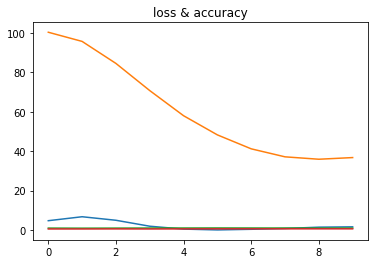

In [ ]:
import matplotlib.pyplot as plt


plt.title('loss & accuracy')
plt.plot(themodel.history['loss'], label='Train')
plt.plot(themodel.history['val_loss'], label='Test')
plt.plot(themodel.history['accuracy'], label='Train')
plt.plot(themodel.history['val_accuracy'], label='Test')
plt.show()

Whats Special About this CNN architecture is, this is Modified LeNet-5 architecture that's fitted to for this output and input, the optimizer is also changed to Adam optimizer because it shows the best accuracy overall,
in this architecture we use Convolution layer and then we maxpool the layer with 2x2 poolsize and then use convolution with dropout layer and then we fully connected the layer and do more dropout layer, last we flatten the layer and then Dense the layer into 2 for 2 output.

The Result of the CNN trainning is that the Accuracy reach 0.94 on the last one but on the Test part we could see that the test accuracy is 0.586 that shows that there's an overfitting problem that could be solved by using more dataset.